# Rain in Australia


### Table of Contents

#### 1. **Information**
    - Reason for Choosing this Dataset ?**
    - Details
    - Objective

#### 2. **Loading Dataset**
    - Importing packages
    - Reading Data
    - Shape of data
    - Dtype

#### 3. **Data Cleansing & EDA**
    - Checking Null values
    - Descriptive Statistics
    - Viz. (Phase 1)
    - Month & Year Extraction
    - Viz. (Phase 2)
    - Correlation Plot
    - Dropping Features
    - Label Encoding
    - Missing value Imputation
    - Normalization
    - Train test Split
    - Over-sampling
    - PCA

#### 4. **Modelling**
    - KNN Classifier
    - Metrics Implementation
    - ROC AUC Plot

#### 5. **Conclusion**

#### 6. **What's next ?**<br><br>


### Reason for Choosing this Dataset ?

- The Reason behind choosing this model is my Personal Interest to explore various Domains out there.


- I want to investigate how Machine Learning can help to Forecast Weather from historical patterns. Where, ML can predict the likelihood of the Rainfall. Thereby, respective actions in the form of Treatments or Preventive Measures would be brought into consideration on the Individual.


- However, this Statistical model is not prepared to use for production environment.


### Details :

This dataset contains daily weather observations from numerous Australia weather stations.
The target variable RainTomorrow means: Did it rain the next day? Yes or No.

The description of data are as follows:
- Date - Date of observation
- Location - the common name of the location of the weather station
- Min Temp - the minimum temperature in degree celsius
- Max Temp - the maximum temperature in degree celsius
- Rainfall - the amount of rainfall recorded for the day in mm
- Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine - The number of hours of bright sunshine in the day.
- WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am - Direction of the wind at 9am
- WindDir3pm - Direction of the wind at 3pm
- WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am - Humidity (percent) at 9am
- Humidity3pm - Humidity (percent) at 3pm
- Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- Temp9am - Temperature (degrees C) at 9am
- Temp3pm - Temperature (degrees C) at 3pm
- RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RISK_MM - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
- RainTomorrow - The target variable. Did it rain tomorrow?


### Questionnaire :

- Which cities do we have in our Dataset ?


- Is our target Imbalanced ?


- Can we extract Months / Years and plot the trend of Min. & Max. Temp for Canberra ? 


- What is the relation of Rainfall & WindGust ? Do we see significant increase / decrease in WindGust with Rainfall / No Rainfall ?


- Which cities experience immense rainfall (Avg. Rainfall) ?


### Objective

- Based on the given features, predict if it will rain tomorrow or not.


- Only KNN Classifier must be used.

### Loading Data

In [0]:
#importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Dataset

df = pd.read_excel('WeatherAustralia.xlsx', header=0, parse_dates=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
#Shape of dataset

print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 142193 
No. of Features :  24


- We can see that our Dataset contains 142193 examples and 24 features (including Target).

In [4]:
#Let us check datset's attribute info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-n

- Above results shows us that we've :
    - **(17) x int64** datatype attributes
    - **(6) x float64** datatype attributes
    - **(1) x datetime64** datatype attribute

### Data Cleansing and EDA

In [5]:
#Examining Null values in each feature

df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

- Above we can observe that we've lot of features with missing values.


- Let us see the same in percentage.

In [6]:
#%percent null values

df.isnull().sum() / df.shape[0] * 100

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

- We can see that we've few features having missing values above 35%.


- Usually in practice 20% to 25% missing value is accepted else we drop it unless we plan to use MICE (Multivariate Imputation by Chained Equations).

In [7]:
#descriptive stats

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


- Descriptive Stats give us better idea about range of continuous data.


- We can observe how MinTemp's Minimum values is -8.5 degree celcius while Max. is 33.90 degree celcius. The values above 75% and below 25% can be considered as Outliers. We observe similar case with MaxTemp, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Temp9am, Temp3pm & RISK_MM.


- Different variables have different scale. We neeed to Normalize the Dataset.

Text(0.5, 1.0, 'Locations')

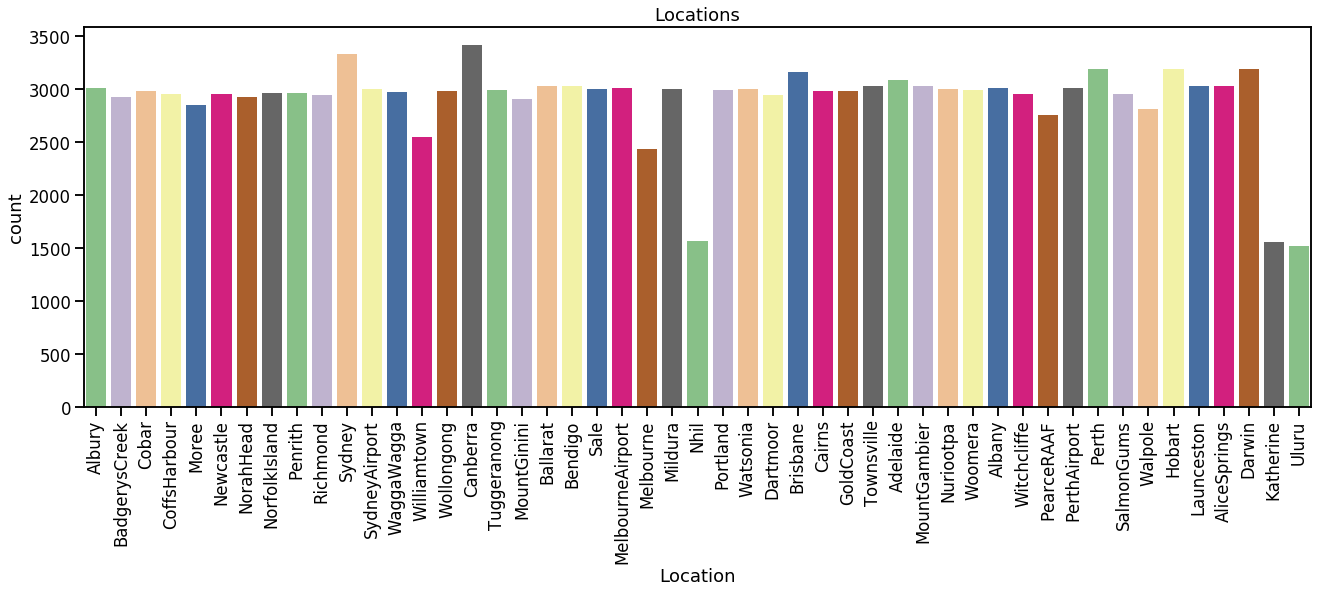

In [8]:
#Brands Count

sns.set_context('talk')
plt.figure(figsize=(22,7))
sns.countplot(df['Location'], palette='Accent')
plt.xticks(rotation=90)
plt.title('Locations')

- Above are the plot depicting count of records for Individual Location across Australia.


- We've very less number of samples for Katherine, Uluru and Nhil. While, Canberra and Sydney claim the maximum samples.

Text(0.5, 1.0, 'Target Class Count')

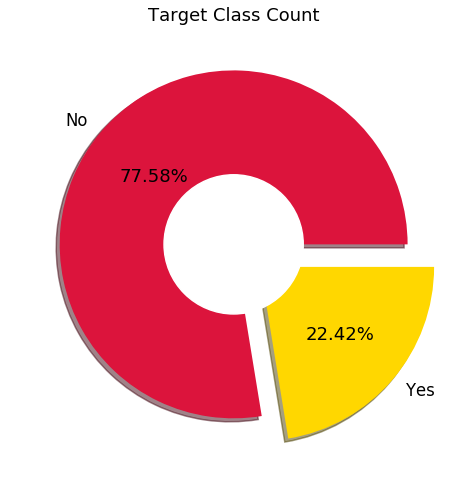

In [22]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df['RainTomorrow'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

- Above plot tells us that we're dealing with Imbalanced dataset.


- We'll need to over-sample the data set.

In [10]:
#Time range

df['Date'].min(), df['Date'].max()

(Timestamp('2007-11-01 00:00:00'), Timestamp('2017-06-25 00:00:00'))

- Our range od data dates from November'07 to July'17.


- One thing to note that we do not have data of few beginning months of 2007 and ending months of 2017.


- So we've close to 10 years of data at our hand.

In [0]:
#month and year extraction

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

- Above we converting DateTime to Pandas DateTime and extracting Year and Months from it for further analysis.

[]

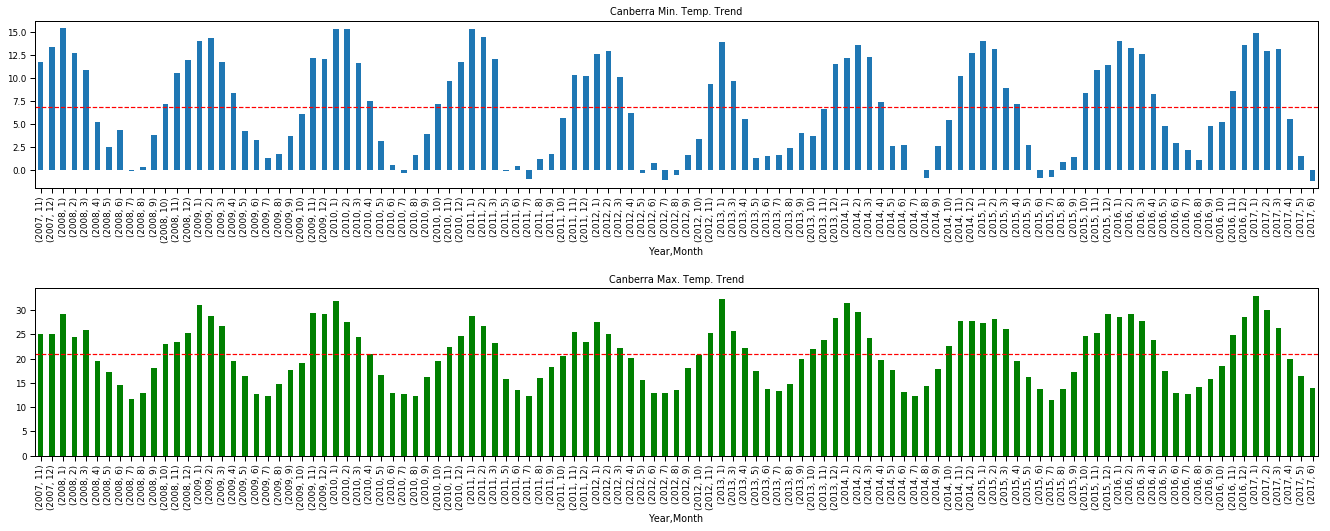

In [12]:
#min_max_temp_by_loc = 

canberra_df = df[df['Location'] == 'Canberra']

min_max_temp_by_loc = canberra_df.groupby(['Year','Month']).agg({'MinTemp':'mean',
                                                                 'MaxTemp':'mean'})


sns.set_context('paper')
plt.subplots_adjust(hspace=0.6)

plt.subplot(2,1,1)
min_max_temp_by_loc['MinTemp'].plot(figsize=(23,10), kind='bar')
plt.axhline(y=canberra_df['MinTemp'].mean(), color='red', linestyle='--')
plt.title('Canberra Min. Temp. Trend')
plt.plot()

plt.subplot(2,1,2)
min_max_temp_by_loc['MaxTemp'].plot(figsize=(23,8), kind='bar', color='g')
plt.axhline(y=canberra_df['MaxTemp'].mean(), color='red', linestyle='--')
plt.title('Canberra Max. Temp. Trend')
plt.plot()

- Above we've plotted Canberra's Average Min. & Max. Temp over the period of decade. 


- We are able to find out a definte trend in Avg. Max. Temp but difficult to find any similar pattern in Avg. Min. Temp. The trend is quite uneven.


- One important thing we can infer is that May or June onwards there is always a significant drop in temperature and August onwards the temperature starts building up again significantly.

Text(0.5, 1.0, 'Canberra - Rainfall VS WindGust (2016)')

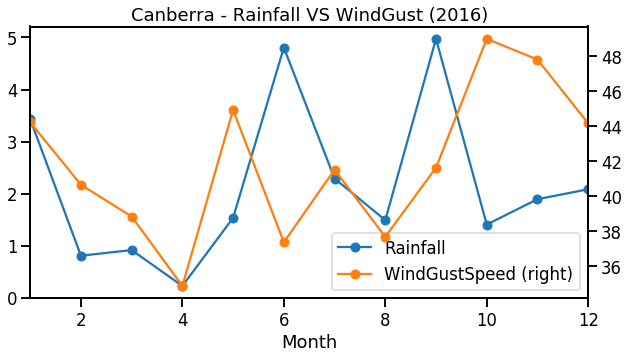

In [13]:
#rainfall vs windgust 2016 - Canberra

canberra_monthly_avg_rainfall_windgust_2016 = canberra_df.groupby(['Year', 'Month']).agg({'Rainfall':'mean',
                                                                                          'WindGustSpeed':'mean'})

canberra_monthly_avg_rainfall_windgust_2016 = canberra_monthly_avg_rainfall_windgust_2016.reset_index()

canberra_monthly_avg_rainfall_windgust_2016 = canberra_monthly_avg_rainfall_windgust_2016[canberra_monthly_avg_rainfall_windgust_2016['Year'] == 2016].drop('Year', axis=1).set_index('Month')


#plotting rainfall & wingust
sns.set_context('talk')
canberra_monthly_avg_rainfall_windgust_2016.plot(secondary_y='WindGustSpeed', figsize=(10,5), marker='o')
plt.title('Canberra - Rainfall VS WindGust (2016)')

- Above plot tells us that there is a correlation between Rainfall & WindGustSpeed.


- As Rainfall (in MM) decreases then WindGust speed tend to decrease as well.


- But thats not the case always, as we can observe Month of June, July, August & September. While in August Rainfall tend to decrease and windgust speed touches the peak of 48 (Secondary Y-axis).

Text(0.5, 1.0, 'Risk MM by Rain Tomorrow')

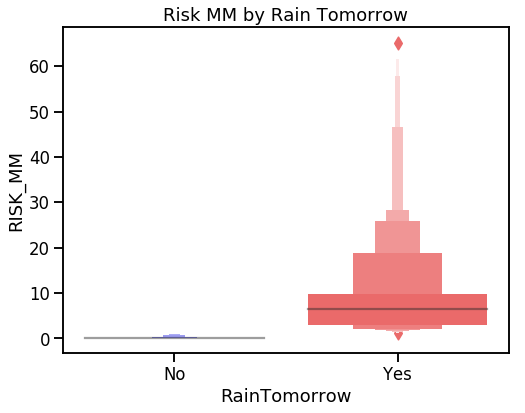

In [14]:
plt.figure(figsize=(8,6))
sns.boxenplot(data=canberra_df[canberra_df['Year'] == 2016], x = 'RainTomorrow', y='RISK_MM', #hue='RainTomorrow', 
              palette='seismic'
             )
plt.title('Risk MM by Rain Tomorrow')

- Above plot shows Risk_MM vs Rain Tomorrow.


- Risk MM states the amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

Text(0.5, 0, 'Location')

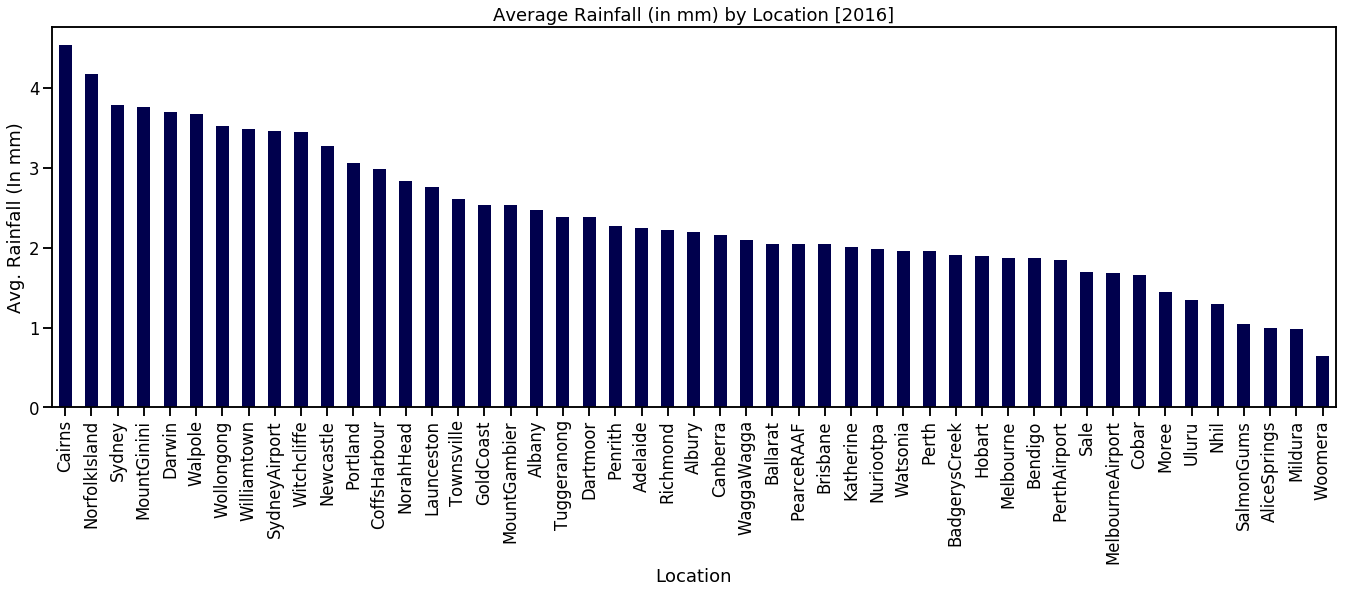

In [15]:
#location_wise_avg._rainfall_for_2016

location_wise_rainfall_2016 = df.groupby(['Year','Location']).agg({'Rainfall':'mean'})
location_wise_rainfall_2016 = location_wise_rainfall_2016.reset_index()
location_wise_rainfall_2016 = location_wise_rainfall_2016[location_wise_rainfall_2016['Year'] == 2016].drop('Year', axis=1).set_index('Location')
location_wise_rainfall_2016.sort_values(by='Rainfall', ascending=False).plot(kind='bar', figsize=(23,7), legend=False, colormap='seismic')
plt.title('Average Rainfall (in mm) by Location [2016]')
plt.ylabel('Avg. Rainfall (In mm)')
plt.xlabel('Location')

- The above plot depicts Avg. rainfall of 2016 by Locations.


- Its evident that Cairns has highest Avg. rainfall in 2016 which is almost 4.5 mm. While Woomera experienced Lowest rainfall in the year which is close to 1 mm.  

Text(0.5, 1.0, 'Correlation')

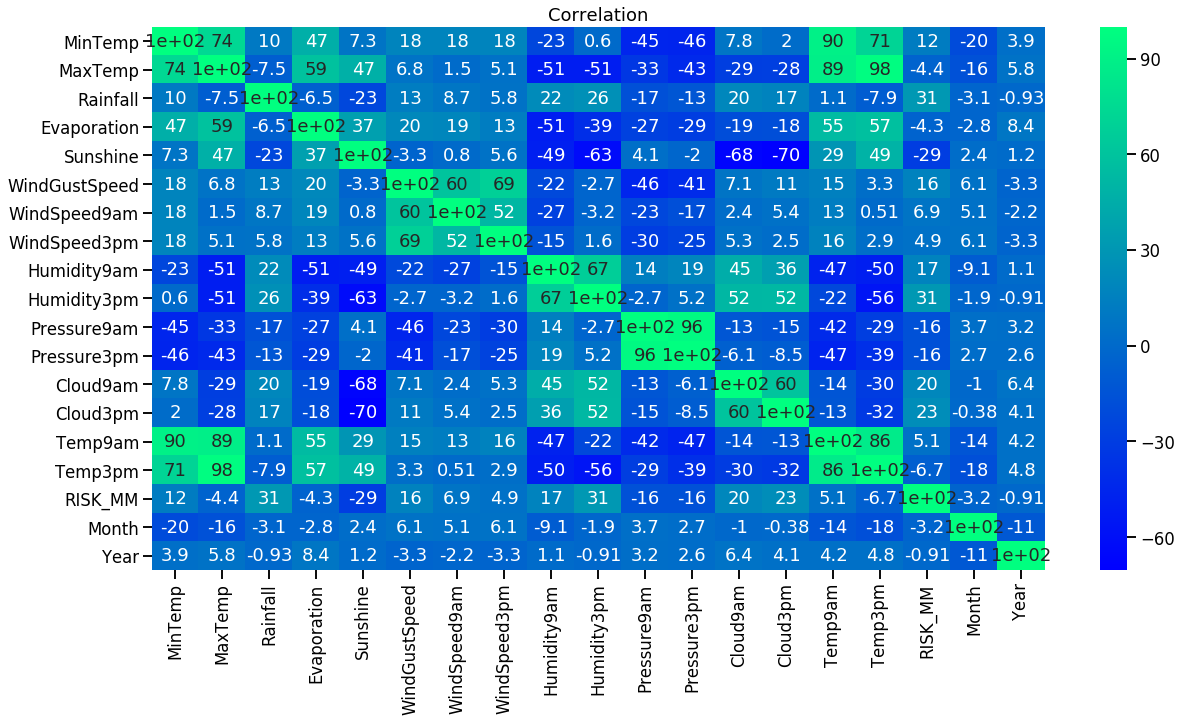

In [16]:
#correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr()*100, annot=True, cmap='winter')
plt.title('Correlation')

- Pearson Correlation (Scaled to 0-100)


- We can observe that there is a strong correlation between MinTemp & MaxTemp.


- Also we can observe MinTemp, MaxTemp both have strong correlation with Temp9am & Temp3pm.


- Pressure9am & Pressure3pm are strongly correlated too.


- We can keep only 1 feature out of correlated ones but my plan is approach with Dimensionality reduction technique in Unsupervised called Principal Component Analysis (PCA). We do not need to rop features. 

In [0]:
#dropping columns with extensive missing values & date

df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date'], axis=1, inplace=True)

- We'll drop Date feature as we had extracted Year and Month.


- Also, we'll drop features with extensive missing values.

In [0]:
#label encoding

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['WindGustDir'] = df['WindGustDir'].replace(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE','S', 'NW', 'SE', 'ESE', 'E', 'SSW'], 
                                              np.arange(0, len(pd.unique(df['WindGustDir']))-1))

df['WindDir9am'] = df['WindDir9am'].replace(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N','WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'],
                                            np.arange(0, len(pd.unique(df['WindDir9am']))-1))

df['WindDir3pm'] = df['WindDir3pm'].replace(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW', 'SW', 'SE', 'N', 'S', 'NNE', 'NE'],
                                            np.arange(0, len(pd.unique(df['WindDir3pm']))-1))

df['RainToday'] = df['RainToday'].replace(['No', 'Yes'], [0, 1])
df['RainTomorrow'] = df['RainTomorrow'].replace(['No', 'Yes'], [0, 1])
df['Location'] = enc.fit_transform(df['Location'])
df['Month'] = enc.fit_transform(df['Month'])
df['Year'] = enc.fit_transform(df['Year'])

- We need to Label encoding to convert categorical features into numerical ones.


- We are using Sklearn's LabelEncoder only to transform values of features with no missing values as it cannot deal with features having missing values, could throw error.


- Instead we'll use replace feature of pandas to replace categorical features except NaN's. 

### Missing values Imputation

In [19]:
#Let's fill NaN values now using FancyInput's IterativeImputer

from fancyimpute import IterativeImputer

df_filled = pd.DataFrame(data=IterativeImputer(imputation_order='ascending', n_iter=50, initial_strategy='median').fit_transform(df.values), columns=df.columns, index=df.index)
df_filled.head()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month,Year
0,2.0,13.4,22.9,0.6,0.0,44.0,0.0,0.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,0.0,11.0,1.0
1,2.0,7.4,25.1,0.0,1.0,44.0,1.0,1.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,0.0,11.0,1.0
2,2.0,12.9,25.7,0.0,2.0,46.0,0.0,1.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,0.0,11.0,1.0
3,2.0,9.2,28.0,0.0,3.0,24.0,2.0,2.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,1.0,0.0,11.0,1.0
4,2.0,17.5,32.3,1.0,0.0,41.0,3.0,3.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.2,0.0,11.0,1.0


- Above we had used IterativeImputer which is basedon Iterations.


- We'll fill values going ascendingly for 50 Iterations having initial strategy as median because median values are not affected by outliers.


- We can also use MICE for imputation but it needs system with big memory. It is a computational expensive technique. While using MICE we do not need to drop features. It can deal with even 50% of missing values.

In [23]:
#rechecking null values

df_filled.isnull().any()

Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
Month            False
Year             False
dtype: bool

In [24]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

x = df_filled.drop('RainTomorrow', axis=1)
y = df_filled.RainTomorrow

cols = x.columns

ss = StandardScaler()

new_df = ss.fit_transform(x)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Month,Year
0,-1.527004,0.189361,-0.046058,-0.209268,-1.668013,0.314120,-1.688732,-1.638862,0.677057,0.613922,0.108823,-1.424634,-1.465160,-1.215588,-0.009592,0.011956,-0.540143,-0.278450,1.633581,-1.872674
1,-1.527004,-0.748073,0.263120,-0.280352,-1.447517,0.314120,-1.461988,-1.417887,-1.127926,0.385500,-1.309357,-1.280100,-1.044827,-1.113231,0.036487,0.370405,-0.540143,-0.278450,1.633581,-1.872674
2,-1.527004,0.111241,0.347441,-0.280352,-1.227022,0.462152,-1.688732,-1.417887,0.564246,0.842344,-1.624508,-1.039209,-1.479654,-0.981630,0.620160,0.212687,-0.540143,-0.278450,1.633581,-1.872674
3,-1.527004,-0.466843,0.670673,-0.280352,-1.006526,-1.166200,-1.235243,-1.196911,-0.338246,-1.099243,-1.256832,-1.713703,-0.030232,-0.382113,0.174726,0.685839,-0.540143,-0.160497,1.633581,-1.872674
4,-1.527004,0.829940,1.274976,-0.161879,-1.668013,0.092072,-1.008499,-0.975936,-0.789492,0.157078,0.686600,-0.894675,-1.015839,-1.376434,0.128646,1.144653,-0.540143,-0.254859,1.633581,-1.872674


- Above we are Standardizing the data set using Standard Scaler.

In [25]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = new_df

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((106644, 20), (35549, 20), (106644,), (35549,))

- Above we're applying train test split on dataset before we perform over-sampling as our data set is highly imbalance. 

### Over-sampling using SMOTE

In [0]:
#implementing SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='not majority')
x_s_res, y_s_res = smote.fit_sample(x_train, y_train)

#print (y_train.value_counts(), '\n')
#np.bincount(y_s_res)

- SMOTE works by creating synthetic observations based upon the existing minority observations (Chawla et al., 2002).


-  For each minority class observation, SMOTE calculates the k nearest neighbors. Depending upon the amount of oversampling needed, one or more of the k-nearest neighbors are selected to create the synthetic examples.


- ![alt text](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

### PCA (Principal Components Analysis)

- Why PCA ? 

    Ans : It's a Dimensionality Reduction Technique. It is also a Feature extraction Technique. By PCA we create new features from old (Original) Features but the new features will always be independent of each other. So, its not just Dimensionality Reduction Process, we are even eliminating Correlation between the Variables. As we have too many highly correlated features we are using PCA.

In [27]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=x_s_res.shape[1])
pca.fit_transform(x_s_res)
var_rat = pca.explained_variance_ratio_
var_rat

array([0.20623445, 0.17932864, 0.11283537, 0.06622147, 0.06303399,
       0.05098981, 0.04821796, 0.04450648, 0.04193736, 0.03840075,
       0.03559833, 0.03271379, 0.02657859, 0.02202254, 0.01300664,
       0.01139387, 0.00413141, 0.00134553, 0.00103332, 0.00046969])

Text(0.5, 1.0, 'Explained Variance by Number of Components')

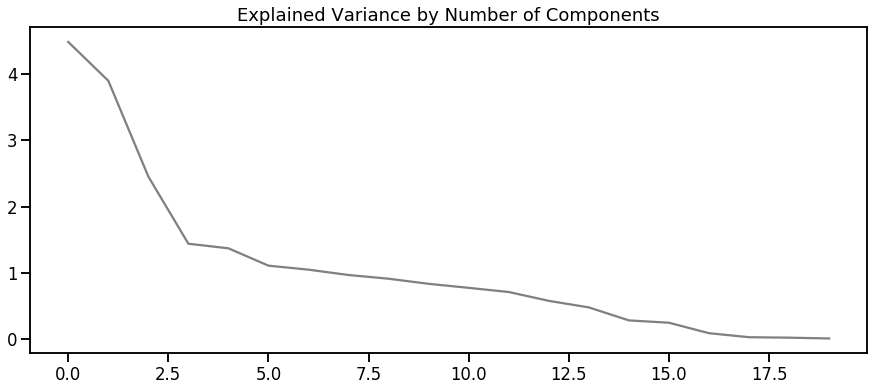

In [28]:
#Variance Ratio vs PC plot

plt.figure(figsize=(15,6))
plt.plot(np.arange(pca.n_components_), pca.explained_variance_, color="grey")
plt.title('Explained Variance by Number of Components')

- At 11th component our PCA model seems to go Flat without explaining much of a Variance.


- Component selection depends on person to person. It may not alwaysgive better results so we can try various numbers.


- We'll proceed ahead with 11 components.

In [0]:
#Applying PCA as per required components

pca = PCA(n_components=11)
transform_train = pca.fit_transform(x_s_res)  #Transforming Train
transform_test = pca.transform(x_test)        #Transforming Validation Set

### KNN Classifier


- Since our goal is to proceed with KNN Classifier we'll go with its implementation.


- KNN Stores all available data and classifies on new input data based on Similarity.


- The new instance is classified based on majority votes of its K-Neighbors. E.g.:, If given instance is close to Class 0 group than Class 1 group so the instance will belong to Class 0. 


- The distance between the given instance and other data points is calculated using following measures :


- ![alt text](https://www.saedsayad.com/images/KNN_similarity.png)


- The lesser the distance between given instance and datapoints, the same class is assigned to our Instance based on Majority Voting.


- ![alt_text](https://www.analyticsvidhya.com/wp-content/uploads/2014/10/scenario1.png)


- Above Image states if blue star is our query then distance is computated to figure out if it belongs to Red Cluster / Class or Green Cluster / Class. 


- ![alt_text](https://www.analyticsvidhya.com/wp-content/uploads/2014/10/scenario2.png)


- We can observe that Post-distance calculation our algorithm figures out which class blue star belongs to and based on that the Red Class is assigned to our blue star.


- Let us implement our KNN Classifier.

In [0]:
#Knn classifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='uniform', metric='euclidean').fit(transform_train, y_s_res)
#knn_clf

pred = knn_clf.predict(transform_test)
pred

array([0., 1., 0., ..., 0., 1., 0.])

In [0]:
#Metrics evaluation

print (' Accuracy Score : ' ,accuracy_score(y_test, pred), '\n', 
       'Validation Score : ', knn_clf.score(transform_test, y_test), '\n',
       'Cross Validation Score : ', cross_val_score(knn_clf, transform_train, y_s_res, cv=5).mean(),'\n',
       'Classification Report : ', '\n', classification_report(y_test, pred))

 Accuracy Score :  0.8324566091873189 
 Validation Score :  0.8324566091873189 
 Cross Validation Score :  0.9029942558046857 
 Classification Report :  
               precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     27522
         1.0       0.60      0.78      0.68      8027

    accuracy                           0.83     35549
   macro avg       0.76      0.81      0.78     35549
weighted avg       0.85      0.83      0.84     35549



- Most important metrics from above is Recall.


- Accuracy can be a illusion in Imbalanced dataset.


- As we had obtained better recall score, we can say that our model is better at classifying both classes.

Text(0.5, 1.0, 'Confusion Matrix')

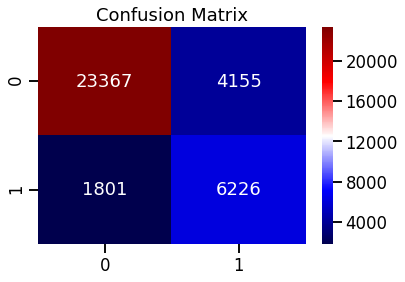

In [0]:
#Confusion matrix

sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='seismic')
plt.title('Confusion Matrix')

- Observation tells us that our model is acceptable. We had classified 23367 records correctly as it isn't going to rain. While, 6226 records classified as it will rain.


- Interpretation of Confusion Matrix is as follows :


![alt_text](https://miro.medium.com/max/356/1*Z54JgbS4DUwWSknhDCvNTQ.png)

### ROC AUC


- When it comes to a classification problem, we can count on an AUC - ROC Curve. When we need to check or visualize the performance of the multi - class classification problem, we use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. 


- It is one of the most important evaluation metrics for checking any classification model’s performance.

Text(0.5, 1.0, 'Receiver operating characteristic - Area Under Curve (ROC-AUC)')

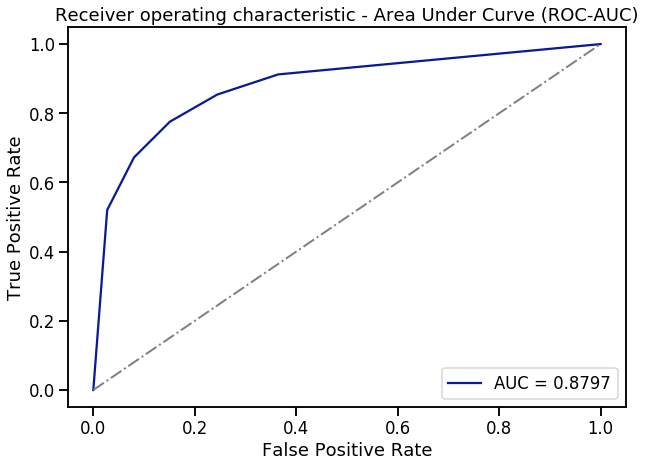

In [0]:
#Roc-Auc

from sklearn.metrics import auc, roc_auc_score, roc_curve

prob = knn_clf.predict_proba(transform_test)

fpr, tpr, _ = roc_curve(y_test, prob[:,1])

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))

plt.plot(fpr, tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC = %0.4f'% roc_auc)
plt.plot([0,1], 'grey', lw=2, linestyle='-.')

plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic - Area Under Curve (ROC-AUC)')

- Above we had achieved AUC of 87.97% (~88%). Which is better.


- Performance of model is called excellent when AUC is close to 1.


- While, close to 0 is termed as worst performing model.

### Conclusion :


- We figured out how our dataset was suffering from Class imbalance & so We handled imbalanced dataset with the help of SMOTE.


- We had achieved feat of 0.8797 AUC which is acceptable. 

### What's next ?


- We can also try to **add more Parameters** for **Tuning the model.**


- One can also try various ways to impute Missing Values.


- One can try also **implement Ensemble method, Tree Algorithm and / or Deep Neural Network** Modelling.